In [13]:
import numpy as np
import matplotlib.pyplot as plt

def m2t(X):
    def l2t(R):
        return  ' & '.join([str(_) for _ in R])
    body = ' \\\\ \n'.join([l2t(_) for _ in X ])
    
    return f"\\begin{{pmatrix}}\n{body}\n\\end{{pmatrix}}"


In [78]:
N = 5

F = [0,1]
for _ in range(30):
    F.append(F[-1] + F[-2])

len(F[:9])

M = np.array(F[:N*N]).reshape(N,N)
np.linalg.det(M)
#np.cross(M[2],M[1])
#M[2] = M[2] -11*M[1]
X = M.copy().T
X

array([[    0,     5,    55,   610,  6765],
       [    1,     8,    89,   987, 10946],
       [    1,    13,   144,  1597, 17711],
       [    2,    21,   233,  2584, 28657],
       [    3,    34,   377,  4181, 46368]])

In [80]:
for a in range(1,4):
    X[-a] = X[-a] - X[-a-1] - X[-a-2]
X

array([[    0,     5,    55,   610,  6765],
       [    1,     8,    89,   987, 10946],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0]])

In [90]:
M.T[1] - 8*(M.T[0]//5)

array([  1,   0,   1,  11, 122])

In [41]:
C  = np.zeros((3,3), dtype=int)
C[1,[0,2]] = 1
C[2,2] = 1
C
C@C@C

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [32]:
ss = '3 0 -1 1 2 -1 0 1 1'
A = np.array([int(_) for _ in ss.split() ],
            dtype=int).reshape(3,3)
B = A - 2*np.identity(3,dtype=int)
B@B

array([[ 1, -1,  0],
       [ 1, -1,  0],
       [ 1, -1,  0]])

In [5]:
m2t(A@A)

\begin{pmatrix}
9 & -1 & -4 \\ 
5 & 3 & -4 \\ 
1 & 3 & 0
\end{pmatrix}


$A^2 = \begin{pmatrix}
9 & -1 & -4 \\ 
5 & 3 & -4 \\ 
1 & 3 & 0
\end{pmatrix},
A^3 = \begin{pmatrix}
26 & -6 & -12 \\ 
18 & 2 & -12 \\ 
6 & 6 & -4
\end{pmatrix}
$

---
$
2^3 I_3 + 2^2\cdot 3 B + 2 \cdot 3 B^2 = 
\begin{pmatrix}
8 & 0 & 0 \\ 
0 & 8 & 0 \\ 
0 & 0 & 8
\end{pmatrix} + \begin{pmatrix}
12 & 0 & -12 \\ 
12 & 0 & -12 \\ 
0 & 12 & -12
\end{pmatrix} + \begin{pmatrix}
6 & -6 & 0 \\ 
6 & -6 & 0 \\ 
6 & -6 & 0
\end{pmatrix}
$

In [15]:
print(m2t(2*np.identity(3).astype(int)) + '+' + m2t(B) )

\begin{pmatrix}
2 & 0 & 0 \\ 
0 & 2 & 0 \\ 
0 & 0 & 2
\end{pmatrix}+\begin{pmatrix}
1 & 0 & -1 \\ 
1 & 0 & -1 \\ 
0 & 1 & -1
\end{pmatrix}


In [17]:
4*np.identity(3).astype(int) + 4*B + B@B

array([[ 9, -1, -4],
       [ 5,  3, -4],
       [ 1,  3,  0]])

$\begin{pmatrix}
2 & 0 & 0 \\ 
0 & 2 & 0 \\ 
0 & 0 & 2
\end{pmatrix}+\begin{pmatrix}
1 & 0 & -1 \\ 
1 & 0 & -1 \\ 
0 & 1 & -1
\end{pmatrix}$

In [16]:
4*np.identity(3)  + B@B + 4*B

array([[ 9., -1., -4.],
       [ 5.,  3., -4.],
       [ 1.,  3.,  0.]])

In [31]:
sum([8*np.identity(3).astype(int), 12*B, 6*B@B]) 

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [26]:
print(' + '.join([m2t(8*np.identity(3).astype(int)), m2t(12*B),m2t(6*B@B)]))

\begin{pmatrix}
8 & 0 & 0 \\ 
0 & 8 & 0 \\ 
0 & 0 & 8
\end{pmatrix} + \begin{pmatrix}
12 & 0 & -12 \\ 
12 & 0 & -12 \\ 
0 & 12 & -12
\end{pmatrix} + \begin{pmatrix}
6 & -6 & 0 \\ 
6 & -6 & 0 \\ 
6 & -6 & 0
\end{pmatrix}


$\begin{pmatrix}
8 & 0 & 0 \\ 
0 & 8 & 0 \\ 
0 & 0 & 8
\end{pmatrix} + \begin{pmatrix}
12 & 0 & -12 \\ 
12 & 0 & -12 \\ 
0 & 12 & -12
\end{pmatrix} + \begin{pmatrix}
6 & -6 & 0 \\ 
6 & -6 & 0 \\ 
6 & -6 & 0
\end{pmatrix}
$

In [6]:
A = [1,1,1,1,2,2,0,1,4]
A = np.array(A).reshape(3,3)
np.linalg.inv(A) @ [1,0,-4]

array([ 2.,  0., -1.])

In [7]:
A = [1,1,1,1,1,2,1,2,-1]
A = np.array(A).reshape(3,3)
np.linalg.inv(A) @ [2,0,0]

array([10., -6., -2.])

In [9]:
np.linalg.det(A)

-1.0

In [10]:
A = [2,1,-3,3,-2,2,5,-3,-1]
A = np.array(A).reshape(3,3)
np.linalg.inv(A) @ [5,5,16]

array([ 1., -3., -2.])

In [41]:
A = [1,1,1,1,1,1,2,2,1,2,-1,-1, 0, 0, 1, -1]
A = np.array(A).reshape(4,4)
np.linalg.inv(A) @ [2,0,1,0]

array([ 9., -5., -1., -1.])

In [38]:
B = np.copy(A)
B[[1,2]] = A[[2,1]]
B

array([[ 1,  1,  1,  1],
       [ 1,  2, -1, -1],
       [ 1,  1,  2,  2],
       [ 0,  0,  1, -1]])

In [39]:
B[1] -= B[0]
B[2] -= B[0]
B

array([[ 1,  1,  1,  1],
       [ 0,  1, -2, -2],
       [ 0,  0,  1,  1],
       [ 0,  0,  1, -1]])

In [13]:
import scipy.linalg

In [20]:
scipy.linalg.lu(B)

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 0., 1., 1.]]),
 array([[ 1.,  1.,  1.,  1.],
        [ 0.,  1., -2., -2.],
        [ 0.,  0.,  1.,  1.],
        [ 0.,  0.,  0., -2.]]))

In [27]:
A = [1,1,1,1,
     2,3,-2,-2,
     1,3,-6,3, 
     1,-1,1,-1]
A = np.array(A).reshape(4,4)
np.linalg.inv(A) @ [5,4,4,-1]

array([1., 2., 1., 1.])

In [36]:
B = np.copy(A)
B= A[[3,0,2,1]]

scipy.linalg.lu(B)

(array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.5       ,  1.        ,  0.        ,  0.        ],
        [ 0.5       , -0.6       ,  1.        ,  0.        ],
        [ 0.5       ,  0.2       , -0.42105263,  1.        ]]),
 array([[ 2.        ,  3.        , -2.        , -2.        ],
        [ 0.        , -2.5       ,  2.        ,  0.        ],
        [ 0.        ,  0.        , -3.8       ,  4.        ],
        [ 0.        ,  0.        ,  0.        ,  3.68421053]]))

In [35]:
B

array([[ 1, -1,  1, -1],
       [ 1,  1,  1,  1],
       [ 1,  3, -6,  3],
       [ 2,  3, -2, -2]])

In [222]:
with open('../MAT102/PARTIEL.txt','r') as fp:
    ss = fp.read()

In [233]:
tt= []
for x in ss.split('\n'):
    row = x.split()
    if len(row) < 4:continue
    tt.append(float(row[0]))
sum(tt)/len(tt)

8.071428571428571

In [207]:
ss = '''2 0 1 -1 1 -2 -1 3 1'''
ss = '''2 3 6 4 -1 1 6 2 7'''
ss = '4 3 6 4 -1 1 6 2 1'
ss = '4 2 4 0 -5 3 1 1 1'
A = np.array([int(x) for x in ss.split()]).reshape(3,3).astype(int)
#scipy.linalg.null_space(A)/0.32624975*9
np.linalg.inv(A)*6

array([[ 8.00000000e+00, -2.00000000e+00, -2.60000000e+01],
       [-3.00000000e+00, -6.66133815e-17,  1.20000000e+01],
       [-5.00000000e+00,  2.00000000e+00,  2.00000000e+01]])

In [209]:
uu = np.sqrt(2)
u = np.array([1,0,1])
v = np.array([1+ uu, -uu, 1- uu])
u @ v/ np.linalg.norm(u)/ np.linalg.norm(v)
np.arccos(.5)/np.pi

np.cross(np.array([1,2,3]), np.array([3,-1,-2]))

array([-1, 11, -7])

In [50]:
uu = []
A = np.random.randint(0,high=6,size=90).reshape(-1,9)


In [3]:
def ut(x,y,z, D=[1,1,1]):
    
    A  = np.diag(D).astype(int)
    A[0,1:] = x,y
    A[1,-1] = z
    return A

A = ut(1,2,3).T @ ut(1,2,1)
#m2t(V)

C = ut(2,1,-1).T @ ut(1,2,4, D=[1,0,1])
C = np.array([3,2,1,1,0,1,0,0,0]).reshape(3,-1)
C[2] = 2*C[1] + C[0]
m2t(C)

\begin{pmatrix}
3 & 2 & 1 \\ 
1 & 0 & 1 \\ 
5 & 2 & 3
\end{pmatrix}


In [256]:
scipy.linalg.null_space(C)

array([[ 0.57735027],
       [-0.57735027],
       [-0.57735027]])

In [247]:
m2t(A), m2t(B)

\begin{pmatrix}
1 & 1 & 2 \\ 
1 & 2 & 3 \\ 
2 & 5 & 8
\end{pmatrix}
\begin{pmatrix}
1 & 1 & 2 \\ 
2 & 2 & 8 \\ 
1 & 1 & -1
\end{pmatrix}


(None, None)

In [215]:
A = np.array([ 1 , 1 , 2 ,
3 , 4 , 7 ,
2 , 3 , 6 ]).reshape(3,-1)
np.linalg.inv(A)

array([[ 3.,  0., -1.],
       [-4.,  2., -1.],
       [ 1., -1.,  1.]])

In [146]:
m2t(np.array([0,0,2,8,-2,-4,-3,1,1]).reshape(3,3) )
m2t( np.linalg.inv(A).astype(int) )

\begin{pmatrix}
0 & 0 & 2 \\ 
8 & -2 & -4 \\ 
-3 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
3 & 0 & -1 \\ 
-4 & 2 & -1 \\ 
1 & -1 & 1
\end{pmatrix}


In [117]:
m2t(V)

\begin{pmatrix}
1 & 1 & 2 \\ 
2 & 3 & 8 \\ 
1 & 0 & 0
\end{pmatrix}


In [148]:
B = np.identity(3).astype(int)
B[:2] = np.array([1,2,3,3,-1,-2]).reshape(2,-1)
B[2] = 4*B[0] - B[1]
m2t(B.T)

\begin{pmatrix}
1 & 3 & 1 \\ 
2 & -1 & 9 \\ 
3 & -2 & 14
\end{pmatrix}


In [155]:
np.cross(B[:,0],B[:,1])/7

array([ 4., -1., -1.])

In [177]:
np.cross(B[0],B[1])

array([-1, 11, -7])

In [166]:
import scipy
from scipy import linalg

In [176]:
scipy.linalg.null_space(B.T)/0.23570226

array([[ 4.00000001],
       [-1.        ],
       [-1.        ]])

In [162]:
np.cross(B.T[:,0],B.T[:,1]), B.T

(array([-1, 11, -7]),
 array([[ 1,  3,  1],
        [ 2, -1,  9],
        [ 3, -2, 14]]))

In [1]:
A = np.random.randint(0,high=6,size=90).reshape(-1,9)
import random
R = [1,2,3]
for k in range(9):
    M = A[k].reshape(3,-1)
    random.shuffle(R)
    
    M[0] = R
    dd = np.linalg.det(M)
    if abs(dd) > 30 :continue
    print(dd)
    print(M)

NameError: name 'np' is not defined

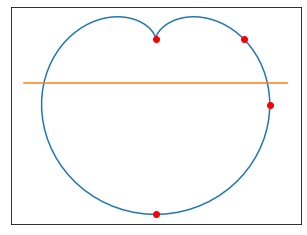

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_aspect('equal')

T = np.linspace(0,np.pi * 2,100)
ax.plot( np.sin(T) + .5*np.sin(2*T), 
        -np.cos(T) -.5*np.cos(2*T))


ax.plot([-1.5,1.5],[0,0])
T = np.array([0,.3333,.5,1])*np.pi
ax.plot( np.sin(T) + .5*np.sin(2*T), -np.cos(T) -.5*np.cos(2*T),'ro')
#ax.plot( np.sin(T) + r*np.sin(ff*T), -np.cos(T) -r*np.cos(ff*T),'ro')

#fig.savefig('apple.png')

In [95]:
t = np.pi/2
np.cos(t) + np.cos(t)**2 - .5

x = .5*(np.sqrt(3) - 1)
x**2 + x -.5
np.arccos(x)/np.pi

0.3807183253753336

In [81]:

np.random.randint(0,10,10)
A = np.arange(6).reshape(2,3)
C = A @ A.T
ee, vv = np.linalg.eig(A@A.T)
U = C - 54*np.identity(2)
C @ [2,7] /54
U = C - np.identity(2)
U @ [7, -2]

def m2t(X):
    def l2t(R):
        return  ' & '.join([str(_) for _ in R])
    body = ' \\\\ \n'.join([l2t(_) for _ in X ])
    
    print(f"\\begin{{pmatrix}}\n{body}\n\\end{{pmatrix}}")



In [92]:
C = A.T @ A
ee, vv = np.linalg.eig(C)
U = C - np.identity(3)
A

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
P = np.identity(3).ravel()
P[[1,2,5]] = [2,3,4]
P = P.reshape(3,3)

In [6]:
uu = np.linalg.inv(P).astype(int)
m2t(P.T.astype(int))

\begin{pmatrix}
1 & 0 & 0 \\ 
2 & 1 & 0 \\ 
3 & 4 & 1
\end{pmatrix}


In [142]:
print(f"\\begin{{pmatrix}}\n{m2t(P)}\n\\end{{pmatrix}}")

\begin{pmatrix}
1.0 & 2.0 & 3.0 \\ 
0.0 & 1.0 & 4.0 \\ 
0.0 & 0.0 & 1.0
\end{pmatrix\}
\begin{pmatrix}
None
\end{pmatrix}


In [7]:
def t2m(ss):
    rows = [x for x in ss.split('\\')]
    rows = [ x.split('&')for x in rows]
    #print(rows)
    cells = [[int(x) for x in row] for row in rows]
    return np.array(cells)

In [8]:
A = t2m('''	8 & 3 & 4 \\
1 & 5 & 9 \\ 
	6 & 7 & 2''')
B = t2m('''1 &  0 & -1 \\ 
	1 & -1 & 0 ''')
C = t2m('''	0 & 1 \\
	0 & 0 \\
	1 & 0 ''')

In [10]:
def m2t(X):
    def l2t(R):
        return  ' & '.join([str(_) for _ in R])
    
    body = ' \\\\ \n'.join([l2t(_) for _ in X ])
    
    print(f"\\begin{{pmatrix}}\n{body}\n\\end{{pmatrix}}")

m2t(C @ B @ A )


\begin{pmatrix}
7 & -2 & -5 \\ 
0 & 0 & 0 \\ 
2 & -4 & 2
\end{pmatrix}


In [13]:
B @ A

array([[ 2, -4,  2],
       [ 7, -2, -5]])

In [11]:
B @ A @ C

array([[ 2,  2],
       [-5,  7]])

In [33]:
C @ B @ A

array([[ 7, -2, -5],
       [ 0,  0,  0],
       [ 2, -4,  2]])

In [28]:
A = \begin{pmatrix}
	8 & 3 & 4 \\ 
	1 & 5 & 9 \\ 
	6 & 7 & 2
\end{pmatrix},
\,
B = \begin{pmatrix}
	1 &  0 & -1 \\ 
	1 & -1 & 0 \\ 
\end{pmatrix},
\,
C = \begin{pmatrix}
	0 & 1 \\
	0 & 0 \\
	1 & 0 
  

SyntaxError: unexpected character after line continuation character (2886812893.py, line 1)

In [81]:
uu = [-1, 5, 4, 0, 0, 1, 1, 2,
1, -4 , -3, -1, 0, 2, 2, 1]
uu = [-1, 5, 4, 0, 0, 1, 1, 2,
1, -4 , -3, -1, 1,1,1,1]
uu = np.array(uu).reshape(4,4)
np.linalg.det(uu)

3.000000000000001

In [71]:
mm = np.matrix([2 - uu, uu, uu, - uu]).reshape(2,2)
mm @ [1,-1]

matrix([[1., 1.]])

In [99]:
P @ [1,1,1],P.T @ [1,1,1], P

(array([6., 5., 1.]),
 array([1., 3., 8.]),
 array([[1., 2., 3.],
        [0., 1., 4.],
        [0., 0., 1.]]))

In [152]:
MS = np.array([[8,3,4],[1,5,9],[6,7,2]])
MS @ np.ones((3,3))

UU = [[1,-1],[-1,1]]
E1 = np.zeros((3,3))
E1[:2,:2] = UU

m2t(np.ones((3,3)).astype(int))

\begin{pmatrix}
1 & 1 & 1 \\ 
1 & 1 & 1 \\ 
1 & 1 & 1
\end{pmatrix}


In [158]:
UU = MS.copy()
UU[0] -= 8*UU[1]
UU[2] -= 6*UU[1]
UU


array([[  0, -37, -68],
       [  1,   5,   9],
       [  0, -23, -52]])

---
# there is an 

easy argument to show that these are all linearly independant

- the matrix on the upper left can't have it's upper left coefficient killed by any linear combination of the others
- so its coefficient must be zero

then it goes by induction

In [218]:
E = np.array([1,-1,-1,1]).reshape(2,2)
G = []
FF = np.zeros((2,2))
X, Y = np.where(FF==0)

for i,j in list(zip(X, Y)):
    Z = np.zeros((3,3))
    Z[i:i+2,j:j+2]  = E
    G.append(Z)
    
G

[array([[ 1., -1.,  0.],
        [-1.,  1.,  0.],
        [ 0.,  0.,  0.]]),
 array([[ 0.,  1., -1.],
        [ 0., -1.,  1.],
        [ 0.,  0.,  0.]]),
 array([[ 0.,  0.,  0.],
        [ 1., -1.,  0.],
        [-1.,  1.,  0.]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  1., -1.],
        [ 0., -1.,  1.]])]

In [210]:
ee = G[1] - (G[1] @ G[0])* G[0]/4

In [220]:
np.ones((3,3)) + G[0] - G[3]

array([[2., 0., 1.],
       [0., 1., 2.],
       [1., 2., 0.]])

In [233]:
MS  - 3*G[0] + 3*G[3] + G[2] - G[1]

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

Si une fonction admet une inverse alors elle est forcement **injective**

Une application **injective** est une application telle que tout y ∈ F a au plus un
antécédent par f.

```Proposition 1.1.``` Une application f est inversible si et seulement si elle est **bijective.**

---

# Test de ligne horizontale

Une ligne horizontale est une ligne droite et plate qui va de gauche à droite. 

Étant donné une fonction (c'est-à-dire des nombres réels aux nombres réels), nous pouvons décider si elle est injective en regardant les lignes horizontales qui coupent le graphe de la fonction .

- Si une ligne horizontale coupe le graphique en plusieurs points, la fonction n'est pas injective. 

In [14]:
ss = """Axel.Barberet@etu.univ-grenoble-alpes.fr;AXEL;BARBERET;
Jean.Camberlin@etu.univ-grenoble-alpes.fr;JEAN;CAMBERLIN;
Serine.Chabane@etu.univ-grenoble-alpes.fr;SERINE;CHABANE;
Szymon.Ciolek@etu.univ-grenoble-alpes.fr;SZYMON;CIOLEK;
Arthur.Deneuche@etu.univ-grenoble-alpes.fr;ARTHUR;DENEUCHE;
Alpha-Oumar.Diallo1@etu.univ-grenoble-alpes.fr;ALPHA OUMAR;DIALLO;
Asya.Erdemir@etu.univ-grenoble-alpes.fr;ASYA;ERDEMIR;
Valentine.Fayolle@etu.univ-grenoble-alpes.fr;VALENTINE;FAYOLLE;
Lara.Fernandes-Ferreira@etu.univ-grenoble-alpes.fr;LARA;FERNANDES FERREIRA;
Mounira.Goulamabasse@etu.univ-grenoble-alpes.fr;MOUNIRA;GOULAMABASSE;
Nael.Haddad@etu.univ-grenoble-alpes.fr;NAEL;HADDAD;
Molka.Hammadi@etu.univ-grenoble-alpes.fr;MOLKA;HAMMADI;
Melina.Hernandez@etu.univ-grenoble-alpes.fr;MELINA;HERNANDEZ;
Alex.Latapie@etu.univ-grenoble-alpes.fr;ALEX;LATAPIE;
Janice.Louis@etu.univ-grenoble-alpes.fr;JANICE;LOUIS;
Marwane.Mahiout@etu.univ-grenoble-alpes.fr;MARWANE;MAHIOUT;
Elsa.Maizi@etu.univ-grenoble-alpes.fr;ELSA;MAIZI;
Yasmine.Mhijy@etu.univ-grenoble-alpes.fr;YASMINE;MHIJY;
Mohammadparsa.Moradi@etu.univ-grenoble-alpes.fr;MOHAMMADPARSA;MORADI;
Lynna.Nacer@etu.univ-grenoble-alpes.fr;LYNNA;NACER;
Charline.Peculier@etu.univ-grenoble-alpes.fr;CHARLINE;PECULIER;
Sofiia.Plakhota@etu.univ-grenoble-alpes.fr;SOFIIA;PLAKHOTA;
Camilia.Rahmouni@etu.univ-grenoble-alpes.fr;CAMILIA;RAHMOUNI;
Floriane.Rattin@etu.univ-grenoble-alpes.fr;FLORIANE;RATTIN;
Aneas.Rotoloni@etu.univ-grenoble-alpes.fr;ANEAS;ROTOLONI;
Maeva.Roussel@etu.univ-grenoble-alpes.fr;MAEVA;ROUSSEL;
Nael.Said-Abdallah@etu.univ-grenoble-alpes.fr;NAEL;SAID ABDALLAH;
Rebecca.Salloum@etu.univ-grenoble-alpes.fr;REBECCA;SALLOUM;
Leona.Seban@etu.univ-grenoble-alpes.fr;LEONA;SEBAN;
Thomas.Soulier@etu.univ-grenoble-alpes.fr;THOMAS;SOULIER;
Alyssa.Tuise@etu.univ-grenoble-alpes.fr;ALYSSA;TUISE;
Magdi.Vitteau@etu.univ-grenoble-alpes.fr;MAGDI;VITTEAU;
"""



In [28]:
import numpy as np

A = [2,-1,3,-1,1,3,-2,1,1]
A = np.array(A).reshape(3,3)
np.linalg.det(A)

4.0

In [29]:
u, v = [2,3,1], [1,2,1]
np.cross(u,v)

array([ 1, -1,  1])

In [30]:
u, v = [1,1,1], [-3,2,1]
np.cross(u,v)

array([-1, -4,  5])

In [40]:
u, v = [3,2,1], [2,1,4]
np.cross(u,v)

array([  7, -10,  -1])

In [27]:
uu = [ x.strip() for x in ss.split(';')]
uu = sorted([a + ' ' + b for a, b in zip(uu[2::3], uu[1::3]) ])

with open('CC1.txt','w') as fp:
    fp.write('\n'.join(uu))

In [12]:
A = [1,2,3,-1,3,4,1,0,2]
A = np.array(A).reshape(3,3)
np.linalg.det(A)

9.000000000000002

In [13]:
A = [1,-1,1,2,2,1,0,-4,1]
A = np.array(A).reshape(3,3)
np.linalg.det(A)

0.0

In [11]:
A = np.array([1,3,2])
B = np.array([2,1,4])
np.cross(A,B)


array([10,  0, -5])

In [10]:
A = np.array([1,0,1])
B = np.array([0,2,3])
np.cross(A,B)

array([-2, -3,  2])

In [35]:
' '.join( [x.strip() for x in ss.split(";")[::3]])

'Axel.Barberet@etu.univ-grenoble-alpes.fr Jean.Camberlin@etu.univ-grenoble-alpes.fr Serine.Chabane@etu.univ-grenoble-alpes.fr Szymon.Ciolek@etu.univ-grenoble-alpes.fr Arthur.Deneuche@etu.univ-grenoble-alpes.fr Alpha-Oumar.Diallo1@etu.univ-grenoble-alpes.fr Asya.Erdemir@etu.univ-grenoble-alpes.fr Valentine.Fayolle@etu.univ-grenoble-alpes.fr Lara.Fernandes-Ferreira@etu.univ-grenoble-alpes.fr Mounira.Goulamabasse@etu.univ-grenoble-alpes.fr Nael.Haddad@etu.univ-grenoble-alpes.fr Molka.Hammadi@etu.univ-grenoble-alpes.fr Melina.Hernandez@etu.univ-grenoble-alpes.fr Alex.Latapie@etu.univ-grenoble-alpes.fr Janice.Louis@etu.univ-grenoble-alpes.fr Marwane.Mahiout@etu.univ-grenoble-alpes.fr Elsa.Maizi@etu.univ-grenoble-alpes.fr Yasmine.Mhijy@etu.univ-grenoble-alpes.fr Mohammadparsa.Moradi@etu.univ-grenoble-alpes.fr Lynna.Nacer@etu.univ-grenoble-alpes.fr Charline.Peculier@etu.univ-grenoble-alpes.fr Sofiia.Plakhota@etu.univ-grenoble-alpes.fr Camilia.Rahmouni@etu.univ-grenoble-alpes.fr Floriane.Ratti

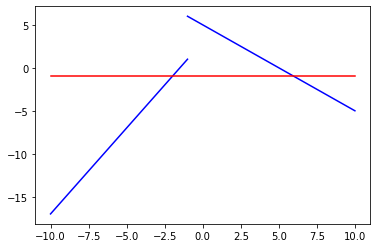

In [18]:
X = np.linspace(-10,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,10,5)
plt.plot(X, - X + 5,'b')
X = np.linspace(-10,10,5)
plt.plot(X, 0*X -1,'r');

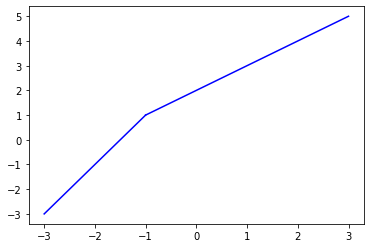

In [17]:
X = np.linspace(-3,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,3,5)
plt.plot(X, X + 2,'b');

In [208]:
pwd


'/home/macbuse/Documents/macbuse.github.io/MAT305'

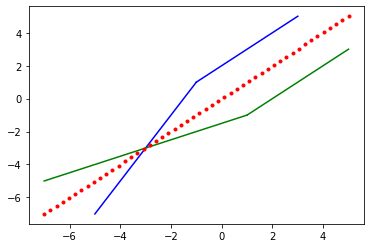

In [37]:
X = np.linspace(-5,-1,5)
plt.plot(X,2*X + 3,'b')
X = np.linspace(-1,3,5)
plt.plot(X, X + 2,'b');
X = np.linspace(-7,1,5)
plt.plot(X, (X - 3)/2,'g')
X = np.linspace(1,5,5)
plt.plot(X, X - 2,'g');
X = np.linspace(-7,5,50)
plt.plot(X,X,'r.');

---

# fonctions élémentaires.

- constantes,
- exponentielles, logarithmes, 
- puissances, polynomes, inverses
- racines n-ièmes 
- fonctions trigonométriques et leur inverses 

sont élémentaires.

In [43]:
A = np.array([1, 2, 2, 0]).reshape(2,2)

In [44]:
B = np.array([2, 1, 0,
3,  -1, 3]).reshape(2,3)

In [45]:
A.dot(B)

array([[ 8, -1,  6],
       [ 4,  2,  0]])

In [86]:
A = np.array([1, 2, 0,
-6, 3, 8,
5, 8, 1]).reshape(3,3)

B = np.array([1, 1,
1, 0,
0, 1]).reshape(3,-1)

In [87]:
A.dot(B)

array([[ 3,  1],
       [-3,  2],
       [13,  6]])

In [84]:
A = np.array([4, 2, 2, 0,
12, 1, 7, 1,
3, -1, 0, 0,
0, 2, 2, 2,
0, 0, 0, 0]).reshape(-1,4)

B = np.array([2, 0,
1, 1,
2, 2,
1, 0]).reshape(4,-1)

In [85]:
print(np.around( A.dot(B) ))

[[14  6]
 [40 15]
 [ 5 -1]
 [ 8  6]
 [ 0  0]]


In [67]:
A, B = np.array([1, 2,2,0]).reshape(2,2), np.array([2, 1,
3, -1]).reshape(2,2)

In [83]:
print(np.around(A.dot(B)))

print(np.around(B.dot(A)) )

[[ 8 -1]
 [ 4  2]]
[[4 4]
 [1 6]]


In [33]:
import numpy as np

A = np.identity(3)
A[1:] *= -1
B = np.zeros((3,3))
B[0,1] = -1
B[1,0] = B[2,2] = 1
B

np.linalg.eig(A.dot(B))

A.dot(B)

array([[ 0., -1.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0., -1.]])

In [36]:
np.linalg.eig(B.dot(A))

(array([ 1., -1., -1.]),
 array([[ 0.70710678, -0.70710678,  0.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [38]:
B.dot(A), A.dot(B)

(array([[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0., -1.]]),
 array([[ 0., -1.,  0.],
        [-1.,  0.,  0.],
        [ 0.,  0., -1.]]))

 une réflexion ou symétrie axiale du plan euclidien est une symétrie orthogonale par rapport à une droite (droite vectorielle s'il s'agit d'un plan vectoriel euclidien). Elle constitue alors une symétrie axiale orthogonale.

Plus généralement, dans un espace euclidien quelconque, une réflexion est une symétrie orthogonale par rapport à un hyperplan, c'est-à-dire à un sous-espace de codimension 1. En dimension 3, il s'agit donc d'une symétrie orthogonale par rapport à un plan. L'origine du terme se conçoit bien en liaison avec les miroirs qui réfléchissent une image.

In [53]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def plot_func(freq):
    x = np.linspace(0, 2*np.pi,1000)
    y = np.sin(x * freq)
    plt.plot(x, y)

interact(plot_func, freq = widgets.FloatSlider(value=2.5, min=1, 
max=5.0,step=0.5));

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0, min=1.0, step=0.5), Output()), _dom_…

In [1]:
pwd

'/home/macbuse/Documents/macbuse.github.io/MAT305'

In [4]:
def f(z):
    return (z + 2J)/(z - 1)

In [5]:
def g(z):
    return (-z -2J)/(-z + 1)

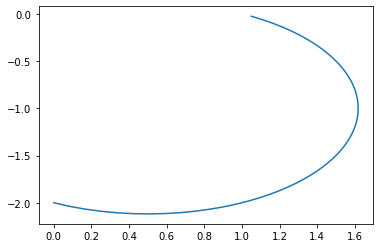

In [23]:
T = np.linspace(0,40,1000)
Z = f(T*1J)
plt.plot( Z.real,Z.imag)

In [9]:
Z

array([-0.         -2.j        , -1.25       -4.5j       ,
       10.        +18.j        ,  2.5        +3.j        ,
        1.81818182 +1.63636364j,  1.5625     +1.125j     ,
        1.42857143 +0.85714286j,  1.34615385 +0.69230769j,
        1.29032258 +0.58064516j,  1.25       +0.5j       ])

In [25]:

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
        
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Parametric_plot')

NameError: name 'go' is not defined

In [60]:
ss= '''12316056 ACHOUR HILANA 2 18,50
12201334 AIT HAMMADI AMINE 2 17,00
12301193 BELLO ALBANE 2 17,00
12212584 BOUSLOUGHA SEMI 2 16,00
12101555 CERDAN AMANDA 2 1,50
12302023 EL HAJJ NAZIHA 2 12,00
12303667 GALES SOLENE 2 20,00
12303159 GASPARI ANOUCHKA 2 12,00
12310563 GERGES ANDREW 2 19,00
12315430 HIJAZI LYNN 2 19,50
12317077 JALIDY IHSANE 2 18,50
12317219 KHALIFE YASMA 2 10,00
12300323 LAGUET MARIE 2 16,00
12300792 LAUDE MAXIME 2 17,00
12311707 LECOMTE NIL 2 20,00
12204766 MEBARKI BADIS 2 12,50
12305109 MEURANT JULIE 2 13,00
12205747 MOSCHIETTO-FRANSA ILONA 2 16,50
12115433 MOUHOUBI MOUNIR 2 X
12211583 PAYART PIERRE 2 7,50
12311537 PRADIER TOM 2 12,50
12302823 SAHEL NISSRINE 2 9,50
12216946 SALAMI MARWA 2 X
12315937 SLEIMAN WALID 2 19,00
12300022 TARROUCHE YACINE 2 15,50
12302610 TEBBANI MOHAMED 2 16,00
12303156 UWENHON--ADEX KALVINE 2 6,50
'''
tt = '''12205215 ABID LINA 1 9,00
12315495 BELKADI MAISSA MELINA 1 20,00
12222551 BENAISSA MEHDI 1 X
12315409 BENGHEDFA MERIEM 1 17,50
12307861 BESSAHA ABDELHAK 1 11,50
12300954 BURGUN ELOISE 1 19,00
12113916 CHABAUD THEO 1 15,00
12110282 COSTA ENZO 1 6,50
12203530 CUGAT PIMPRENELLE 1 20,00
12208897 DENEUCHE ARTHUR 1 13,00
12103314 DRIEUX BERENICE 1 X
12309195 DUCHAMP JULIE 1 19,50
12208316 FAURE CECILIE 1 6,50
12201317 FORST VALENTIN 1 12,00
12313046 GHARIB ADRIEN 1 17,50
12110003 GUERZIZ DALYA 1 9,50
12211794 HADJ DOUDOU MOHAMED-RYAD 1 10,00
12305972 HALLER REMI 1 12,00
12213506 HAMMADI MOLKA 1 8,50
12213585 JEAN SIMON GUATHINA 1 12,00
12215898 MUGNIER FLORE 1 15,50
12313898 OLIVIER VALENTIN 1 9,00
12217455 OUEDRAOGO IBRAHIM 1 12,50
12301153 SAWKI CHARLOTTE 1 15,50
12116887 SOW AMADOU IDRISSA 1 20,00
12300520 TONDEUR LEA 1 19,00
12311693 TRESS SEBASTIAN 1 12,50
'''

In [94]:
X=[]

for cc in [ss,tt]:
    N = [ _.split()[-1] for _ in cc.split('\n')[:-1]]
    N = [ _ for _ in N if len(_) >1]
    N = ' '.join(N).replace(',','.').split()
    X.append([float(_) for _ in N])

In [96]:
X[0]

[18.5,
 17.0,
 17.0,
 16.0,
 1.5,
 12.0,
 20.0,
 12.0,
 19.0,
 19.5,
 18.5,
 10.0,
 16.0,
 17.0,
 20.0,
 12.5,
 13.0,
 16.5,
 7.5,
 12.5,
 9.5,
 19.0,
 15.5,
 16.0,
 6.5]

(array([2., 3., 2., 1., 6., 0., 3., 0., 2., 6.]),
 array([ 6.5 ,  7.85,  9.2 , 10.55, 11.9 , 13.25, 14.6 , 15.95, 17.3 ,
        18.65, 20.  ]),
 <BarContainer object of 10 artists>)

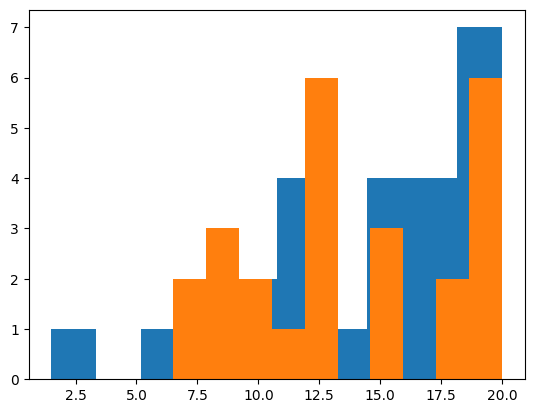

In [99]:
bb = 10
plt.hist(X[0], bins=bb)
plt.hist(X[1], bins=bb)

In [63]:
len([_ for _ in N if _ > 14])

11

(array([2., 4., 2., 6., 0., 3., 2., 6.]),
 array([ 6.5   ,  8.1875,  9.875 , 11.5625, 13.25  , 14.9375, 16.625 ,
        18.3125, 20.    ]),
 <BarContainer object of 8 artists>)

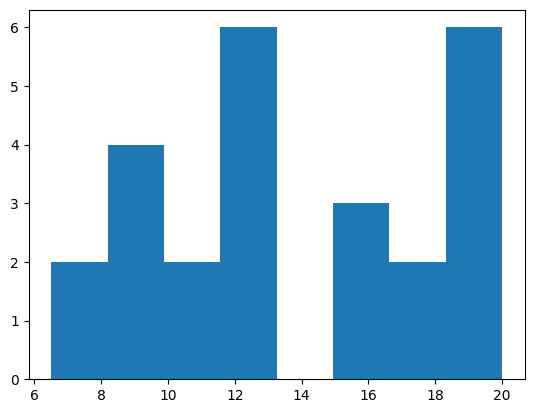

In [62]:
plt.hist(N, bins=8)

In [72]:
N.sort()
Y = N[1:]
sum(Y)/len(Y)

15.041666666666666

In [70]:
N

[1.5,
 6.5,
 7.5,
 9.5,
 10.0,
 12.0,
 12.0,
 12.5,
 12.5,
 13.0,
 15.5,
 16.0,
 16.0,
 16.0,
 16.5,
 17.0,
 17.0,
 17.0,
 18.5,
 18.5,
 19.0,
 19.0,
 19.5,
 20.0,
 20.0]